In [1]:
#Imports
import pandas as pd
import seaborn as sns
from functions import add_sentiment
from textblob import TextBlob, Word, Blobber

In [2]:
#DataFrame
df = pd.read_csv('tweets_labeled.csv')
df.head()

,tweet_id,text,label
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0


In [4]:
#add sentiment with handwritten feature, takes a while :-)
df['sentiment'] = df['text'].apply(add_sentiment)
df.head()

,tweet_id,text,label,sentiment_textblob,sentiment
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1,2,2
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1,4,4
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0,0,0
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0,0,0
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0,-2,-2


In [5]:
#add textblob sentiment
df['sentiment_textblob'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0])

df.head()

,tweet_id,text,label,sentiment_textblob,sentiment
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1,0.00,2
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1,0.25,4
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0,0.00,0
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0,0.00,0
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0,0.00,-2


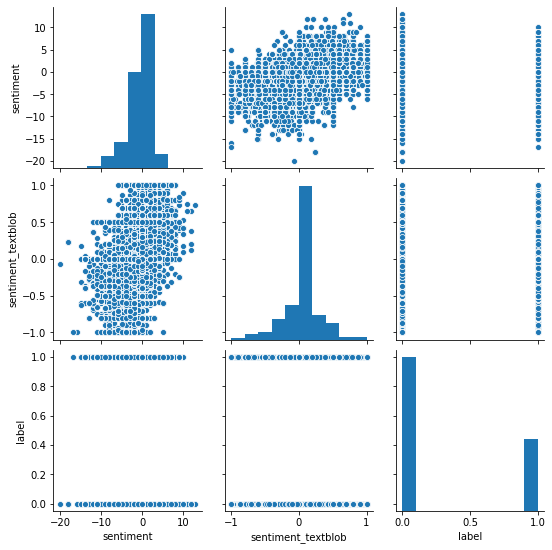

In [19]:
#subset without label and tweet_id
df_subset = df[['text','sentiment','sentiment_textblob','label']]

#pairplot of subset
sns.pairplot(df_subset)

In [20]:
#correlation matrix
corr = df_subset.corr()
corr

,sentiment,sentiment_textblob,label
sentiment,1.000000,0.452418,0.039341
sentiment_textblob,0.452418,1.000000,0.016828
label,0.039341,0.016828,1.000000


In [22]:
#sort on sentiment
df_subset =  df_subset.sort_values(by='sentiment', ascending=False)
df_subset.head(50)

                                                     text  sentiment  \
60809   'WTH!! Babies need to be loved and cherished a...       13.0   
184796  'Okay I’m a Philly diehard, and this is pretty...       12.0   
122982  'Funny because it's true or not funny because ...       12.0   
221689  'Funny not funny, but funny https://t.co/Kd65Z...       12.0   
19815   'Ok, fair is fair - as an Eagles fan, time to ...       12.0   
139296  'RT @SecretSunBlog: Funny because it's true or...       12.0   
175604  'God bless our Troops... I TRUST &amp love our...       11.0   
160363  'Got to love Ricky Rebel and Joy Villa as they...       11.0   
75329   'RT @AStrongerOZ: Well this is fantastic isn't...       10.0   
91613   'RT @AStrongerOZ: Well this is fantastic isn't...       10.0   
186872  'RT @AStrongerOZ: Well this is fantastic isn't...       10.0   
225131  'RT @AStrongerOZ: Well this is fantastic isn't...       10.0   
198036  'RT @AStrongerOZ: Well this is fantastic isn't...       